In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [3]:
df.duplicated().sum()

0

In [4]:
df.drop(columns=['Serial No.'],inplace = True)

In [5]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1:]

In [6]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
x_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [20]:
model  = Sequential()
model.add(Dense(7,activation = 'relu',input_dim=7))
model.add(Dense(7,activation = 'relu',input_dim=7))
model.add(Dense(1,activation='linear'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='mean_squared_error',optimizer='Adam')
history = model.fit(x_train_scaled,y_train,epochs = 100, validation_split = 0.2)

Epoch 1/100
10/10 [==============================] - 1s 28ms/step - loss: 0.0559 - val_loss: 0.0414
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0406 - val_loss: 0.0346
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0361 - val_loss: 0.0308
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0313 - val_loss: 0.0270
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0274 - val_loss: 0.0241
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0243 - val_loss: 0.0215
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0217 - val_loss: 0.0194
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0193 - val_loss: 0.0175
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0173 - val_loss: 0.0158
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0156 - val_loss: 0.0144
Epoch 1

In [23]:
y_pred = model.predict(x_test_scaled)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test,y_pred)

0.8224599771857118

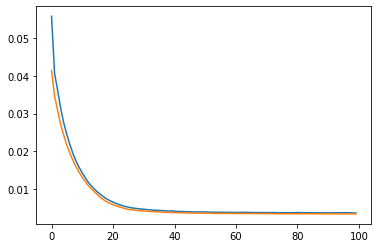

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])